In [ ]:
!git clone https://github.com/AdaptiveBProcess/GenerativeLSTM.git

Cloning into 'GenerativeLSTM'...
remote: Enumerating objects: 814, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 814 (delta 100), reused 88 (delta 88), pack-reused 698
Receiving objects: 100% (814/814), 47.16 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (472/472), done.


In [ ]:
!git clone https://github.com/Mcamargo85/support_modules.git

Cloning into 'support_modules'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 228 (delta 131), reused 156 (delta 59), pack-reused 0
Receiving objects: 100% (228/228), 437.42 KiB | 2.65 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [ ]:
pip install pm4py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=33f8fbd508de364a9367d4b6b3d1f9d3a0e6657770adecffc841d4a9806149f6
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23608 sha256=8bd07703d95ede8810ddf7638d74839bf1977c55bc66fbd814fb4be87f5076f9
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [ ]:
import os
import sys

os.chdir(r"support_modules")
sys.path.append(os.path.join( 'support_modules')) 


In [ ]:
from support_modules.readers import log_reader as lr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datacsv = '/content/drive/MyDrive/MBIT/DeepLearning/gen_BPI_Challenge_2012_W_Two_TS_1.csv'

In [ ]:
dataxes ='/content/drive/MyDrive/MBIT/DeepLearning/Helpdesk.xes'

In [ ]:
dataxes2 ='/content/drive/MyDrive/MBIT/DeepLearning/T_BPIC15_1.xes'

In [ ]:
dataxes3 = '/content/support_modules/tests/fixtures/PurchasingExample.xes'

In [ ]:
dataxes4 ='/content/drive/MyDrive/MBIT/DeepLearning/BPI_Challenge_2017_W_Two_TS.xes'

In [ ]:
import pandas as pd
column_names = {'Case ID': 'caseid', 'Activity': 'task',
                    'lifecycle:transition': 'event_type', 'Resource': 'user'}
settings = {'timeformat': '%Y-%m-%dT%H:%M:%S.%f',
                'column_names': column_names,
                'one_timestamp': False,
                'filter_d_attrib': True}
                
                

log = lr.LogReader(dataxes3,settings)


parsing log, completed traces ::   0%|          | 0/608 [00:00<?, ?it/s]

Rearranging log traces ...      [DONE]


In [ ]:
df = pd.DataFrame(log.data)

In [ ]:
df

,caseid,task,user,end_timestamp,start_timestamp
0,1,Start,Start,2010-12-31 23:59:59.999999,2010-12-31 23:59:59.999999
1,1,Create Purchase Requisition,Kim Passa,2011-01-01 00:37:00.000000,2011-01-01 00:00:00.000000
2,1,Create Request for Quotation,Kim Passa,2011-01-01 05:45:00.000000,2011-01-01 05:37:00.000000
3,1,Analyze Request for Quotation,Karel de Groot,2011-01-01 06:55:00.000000,2011-01-01 06:41:00.000000
4,1,Send Request for Quotation to Supplier,Karel de Groot,2011-01-01 12:09:00.000000,2011-01-01 11:43:00.000000
...,...,...,...,...,...
10330,997,Create Purchase Requisition,Kim Passa,2011-05-25 05:04:00.000000,2011-05-25 04:20:00.000000
10331,997,Analyze Purchase Requisition,Maris Freeman,2011-05-25 15:29:00.000000,2011-05-25 15:25:00.000000
10332,997,Create Request for Quotation,Maris Freeman,2011-05-25 15:35:00.000000,2011-05-25 15:32:00.000000
10333,997,Analyze Request for Quotation,Magdalena Predutta,2011-05-29 10:44:00.000000,2011-05-29 10:18:00.000000


In [ ]:


os.chdir(r"/content/GenerativeLSTM")
sys.path.append(os.path.join( '/content/GenerativeLSTM')) 


In [ ]:
import os
os.chdir("/content/drive/MyDrive/MBIT")
from DeepLearning import Indexing as ind

In [ ]:
def create_index(log_df, column):
        """Creates an idx for a categorical attribute.
        parms:
            log_df: dataframe.
            column: column name.
        Returns:
            index of a categorical attribute pairs.
        """
        temp_list = log_df[[column]].values.tolist()
        subsec_set = {(x[0]) for x in temp_list}
        subsec_set = sorted(list(subsec_set))
        alias = dict()
        for i, _ in enumerate(subsec_set):
            alias[subsec_set[i]] = i + 1
        return alias

In [ ]:
create_index(df,"task")

{'Amend Purchase Requisition': 1,
 'Amend Request for Quotation': 2,
 'Analyze Purchase Requisition': 3,
 'Analyze Quotation Comparison Map': 4,
 'Analyze Request for Quotation': 5,
 'Approve Purchase Order for payment': 6,
 "Authorize Supplier's Invoice payment": 7,
 'Choose best option': 8,
 'Confirm Purchase Order': 9,
 'Create Purchase Order': 10,
 'Create Purchase Requisition': 11,
 'Create Quotation comparison Map': 12,
 'Create Request for Quotation': 13,
 'Deliver Goods Services': 14,
 'End': 15,
 'Pay Invoice': 16,
 'Release Purchase Order': 17,
 "Release Supplier's Invoice": 18,
 'Send Invoice': 19,
 'Send Request for Quotation to Supplier': 20,
 'Settle Conditions With Supplier': 21,
 'Settle Dispute With Supplier': 22,
 'Start': 23}

In [ ]:
def indexing(log):
        # Activities index creation
        ac_index = create_index(log, 'task')
        ac_index['start'] = 0
        ac_index['end'] = len(ac_index)
        index_ac = {v: k for k, v in ac_index.items()}
        # Roles index creation
        rl_index = create_index(log, 'user')
        rl_index['start'] = 0
        rl_index['end'] = len(rl_index)
        index_rl = {v: k for k, v in rl_index.items()}
        # Add index to the event log
        ac_idx = lambda x: ac_index[x['task']]
        log['ac_index'] = log.apply(ac_idx, axis=1)
        rl_idx = lambda x: rl_index[x['user']]
        log['rl_index'] = log.apply(rl_idx, axis=1)
       



In [ ]:
indexing(df)

In [ ]:
df

,caseid,task,user,end_timestamp,start_timestamp,ac_index,rl_index
0,1,Start,Start,2010-12-31 23:59:59.999999,2010-12-31 23:59:59.999999,23,28
1,1,Create Purchase Requisition,Kim Passa,2011-01-01 00:37:00.000000,2011-01-01 00:00:00.000000,11,19
2,1,Create Request for Quotation,Kim Passa,2011-01-01 05:45:00.000000,2011-01-01 05:37:00.000000,13,19
3,1,Analyze Request for Quotation,Karel de Groot,2011-01-01 06:55:00.000000,2011-01-01 06:41:00.000000,5,17
4,1,Send Request for Quotation to Supplier,Karel de Groot,2011-01-01 12:09:00.000000,2011-01-01 11:43:00.000000,20,17
...,...,...,...,...,...,...,...
10330,997,Create Purchase Requisition,Kim Passa,2011-05-25 05:04:00.000000,2011-05-25 04:20:00.000000,11,19
10331,997,Analyze Purchase Requisition,Maris Freeman,2011-05-25 15:29:00.000000,2011-05-25 15:25:00.000000,3,22
10332,997,Create Request for Quotation,Maris Freeman,2011-05-25 15:35:00.000000,2011-05-25 15:32:00.000000,13,22
10333,997,Analyze Request for Quotation,Magdalena Predutta,2011-05-29 10:44:00.000000,2011-05-29 10:18:00.000000,5,21


In [ ]:
 df.ac_index

0        23
1        11
2        13
3         5
4        20
         ..
10330    11
10331     3
10332    13
10333     5
10334    15
Name: ac_index, Length: 10335, dtype: int64

In [ ]:
import gensim



In [ ]:
from lxml import etree
def get_sentences_XES(filename):
    texts = []

    tree = etree.parse('/content/support_modules/tests/fixtures/'+filename)
    root= tree.getroot()
    for element in root.iter():
        tag= element.tag.split('}')[1]
        if(tag== "trace"):
            wordslist = []
            tagslist = []
            for childelement in element.iterchildren():
                ctag= childelement.tag.split('}')[1]
                if(ctag== "string" and childelement.get('key')=='concept:name'):
                    doc_name=childelement.get('value')
                elif (ctag=="event"):
                    for grandchildelement in childelement.iterchildren():
                        if(grandchildelement.get('key')=='concept:name'):
                            event_name=grandchildelement.get('value')
                        #    print(event_name)
                            wordslist.append(event_name.replace(' ',''))
            texts.append(wordslist)
    return texts

In [ ]:
sentences = get_sentences_XES('PurchasingExample.xes')

In [ ]:
sentences

[['CreatePurchaseRequisition',
  'CreatePurchaseRequisition',
  'CreateRequestforQuotation',
  'CreateRequestforQuotation',
  'AnalyzeRequestforQuotation',
  'AnalyzeRequestforQuotation',
  'SendRequestforQuotationtoSupplier',
  'SendRequestforQuotationtoSupplier',
  'CreateQuotationcomparisonMap',
  'CreateQuotationcomparisonMap',
  'AnalyzeQuotationComparisonMap',
  'AnalyzeQuotationComparisonMap',
  'Choosebestoption',
  'Choosebestoption',
  'SettleConditionsWithSupplier',
  'SettleConditionsWithSupplier',
  'CreatePurchaseOrder',
  'CreatePurchaseOrder',
  'ConfirmPurchaseOrder',
  'ConfirmPurchaseOrder',
  'DeliverGoodsServices',
  'DeliverGoodsServices',
  'ReleasePurchaseOrder',
  'ReleasePurchaseOrder',
  'ApprovePurchaseOrderforpayment',
  'ApprovePurchaseOrderforpayment',
  'SendInvoice',
  'SendInvoice',
  "ReleaseSupplier'sInvoice",
  "ReleaseSupplier'sInvoice",
  "AuthorizeSupplier'sInvoicepayment",
  "AuthorizeSupplier'sInvoicepayment",
  'PayInvoice',
  'PayInvoice'],
 

In [ ]:
def learn(sent,vectorsize):
    #train model
    model = gensim.models.Word2Vec(sent, size= vectorsize,  min_count=0)
    nrEpochs= 10
    for epoch in range(nrEpochs):
        if epoch % 2 == 0:
            print ('Now training epoch %s'%epoch)
        model.train(sent,start_alpha=0.025, epochs=nrEpochs,total_examples=model.corpus_count)
        model.alpha -= 0.002  # decrease the learning rate
        model.min_alpha = model.alpha  # fix the learning rate, no decay
    print (model.wv.most_similar('AnalyzePurchaseRequisition'))
    print (model.wv['AmendPurchaseRequisition'])
    print (model.wv['AmendRequestforQuotation'])   
    print (model.wv['AnalyzePurchaseRequisition']) 
    print (model.wv['AnalyzeQuotationComparisonMap'])  
    print (model.wv['AnalyzeRequestforQuotation'])   
    print (model.wv['ApprovePurchaseOrderforpayment'])   
    print (model.wv["AuthorizeSupplier'sInvoicepayment"])  
    print (model.wv['Choosebestoption']) 
    print (model.wv['ConfirmPurchaseOrder']) 
    print (model.wv['CreatePurchaseOrder']) 
    print (model.wv['CreatePurchaseRequisition']) 
    print (model.wv['CreateQuotationcomparisonMap'])   
    print (model.wv['CreateRequestforQuotation']) 
    print (model.wv['DeliverGoodsServices']) 
    print (model.wv['PayInvoice']) 
    print (model.wv['ReleasePurchaseOrder']) 
    print (model.wv["ReleaseSupplier'sInvoice"]) 
    print (model.wv['SendInvoice']) 
    print (model.wv['SendRequestforQuotationtoSupplier']) 
    print (model.wv['SettleConditionsWithSupplier']) 
    print (model.wv['SettleDisputeWithSupplier']) 
    
    model.wv.save('/content/drive/MyDrive/MBIT/DeepLearning/'+'A2VVS'+str(vectorsize) +'.model')
    

In [ ]:
learn(sentences,4)

Now training epoch 0
Now training epoch 2
Now training epoch 4
Now training epoch 6
Now training epoch 8
[('CreatePurchaseRequisition', 0.9980298280715942), ('CreateRequestforQuotation', 0.9437954425811768), ('SendRequestforQuotationtoSupplier', 0.7863777279853821), ('AnalyzeRequestforQuotation', 0.7069657444953918), ('CreateQuotationcomparisonMap', 0.6421744227409363), ('AnalyzeQuotationComparisonMap', 0.6188355684280396), ('AmendRequestforQuotation', 0.40090107917785645), ('AmendPurchaseRequisition', 0.3081013858318329), ('Choosebestoption', 0.19426536560058594), ('SettleConditionsWithSupplier', 0.0725572407245636)]
[-2.7139     -7.799795    0.32064676  3.668396  ]
[-0.06065138  0.02153261 -2.8305776  -4.0397606 ]
[ 2.2206266 -2.5541244 -1.9762783 -0.6035336]
[ 2.0885541  -0.37183917 -0.11146782  0.62251604]
[ 1.1405354  -0.69484806 -2.337615   -2.6029103 ]
[-0.4349221  1.4984152  2.3094213  1.199537 ]
[-2.6538355  1.9430723  4.1207247  1.9014336]
[1.915788   0.42501545 0.62915605 0.

In [ ]:
from lxml import etree
def get_roles_XES(filename):
    texts = []

    tree = etree.parse('/content/support_modules/tests/fixtures/'+filename)
    root= tree.getroot()
    for element in root.iter():
        tag= element.tag.split('}')[1]
        if(tag== "trace"):
            wordslist = []
            tagslist = []
            for childelement in element.iterchildren():
                ctag= childelement.tag.split('}')[1]
                if(ctag== "string" and childelement.get('key')=='org:resource'):
                    doc_name=childelement.get('value')
                elif (ctag=="event"):
                    for grandchildelement in childelement.iterchildren():
                        if(grandchildelement.get('key')=='org:resource'):
                            event_name=grandchildelement.get('value')
                        #    print(event_name)
                            wordslist.append(event_name.replace(' ',''))
            texts.append(wordslist)
    return texts

In [ ]:
roles = get_roles_XES('PurchasingExample.xes')

In [ ]:
roles

[['KimPassa',
  'KimPassa',
  'KimPassa',
  'KimPassa',
  'KareldeGroot',
  'KareldeGroot',
  'KareldeGroot',
  'KareldeGroot',
  'MagdalenaPredutta',
  'MagdalenaPredutta',
  'ImmanuelKaragianni',
  'ImmanuelKaragianni',
  'TescaLobes',
  'TescaLobes',
  'FrancoisdePerrier',
  'FrancoisdePerrier',
  'KareldeGroot',
  'KareldeGroot',
  'SeanManney',
  'SeanManney',
  'SeanManney',
  'SeanManney',
  'ElviraLores',
  'ElviraLores',
  'KareldeGroot',
  'KareldeGroot',
  'KiuKan',
  'KiuKan',
  'KaraldaNimwada',
  'KaraldaNimwada',
  'KaraldaNimwada',
  'KaraldaNimwada',
  'PedroAlvares',
  'PedroAlvares'],
 ['ImmanuelKaragianni',
  'ImmanuelKaragianni',
  'AlbertoDuport',
  'AlbertoDuport',
  'KareldeGroot',
  'KareldeGroot',
  'ChristianFrancois',
  'ChristianFrancois',
  'MagdalenaPredutta',
  'MagdalenaPredutta',
  'EsmanaLiubiata',
  'EsmanaLiubiata',
  'KareldeGroot',
  'KareldeGroot',
  'FrancoisdePerrier',
  'FrancoisdePerrier',
  'KareldeGroot',
  'KareldeGroot',
  'EsmanaLiubiata

In [ ]:
from lxml import etree
def get_times_XES(filename):
    texts = []

    tree = etree.parse(filename)
    root= tree.getroot()
    print(root)
    for element in root.iter():
        tag= element.tag.split('}')[1]
        if(tag== "trace"):
            wordslist = []
            tagslist = []
            for childelement in element.iterchildren():
                ctag= childelement.tag.split('}')[1]
                if(ctag== "string" and childelement.get('key')=='time:timestamp'):
                    doc_name=childelement.get('value')
                elif (ctag=="event"):
                    for grandchildelement in childelement.iterchildren():
                        if(grandchildelement.get('key')=='time:timestamp'):
                            event_name=grandchildelement.get('value')
                        #    print(event_name)
                            wordslist.append(event_name.replace(' ',''))
            texts.append(wordslist)
    return texts

In [ ]:
times = get_times_XES('/content/drive/MyDrive/MBIT/Tesis1/ConsultaDataMining201618.xes')

<Element {http://www.xes-standard.org}log at 0x7ff6c93d3e10>


In [ ]:
times


[['2016-02-01T13:23:52.000+02:00',
  '2016-02-01T13:23:52.000+02:00',
  '2016-02-01T13:23:52.000+02:00',
  '2016-02-01T13:23:52.000+02:00',
  '2016-02-01T13:24:02.000+02:00',
  '2016-02-01T13:24:02.000+02:00',
  '2016-02-01T13:27:47.000+02:00',
  '2016-02-01T13:32:06.000+02:00',
  '2016-02-01T21:19:41.000+02:00',
  '2016-02-01T21:38:15.000+02:00',
  '2016-02-01T21:38:15.000+02:00',
  '2016-02-01T21:38:15.000+02:00'],
 ['2016-02-01T18:53:46.000+02:00',
  '2016-02-01T18:53:46.000+02:00',
  '2016-02-01T18:53:46.000+02:00',
  '2016-02-01T18:53:46.000+02:00',
  '2016-02-01T18:53:50.000+02:00',
  '2016-02-01T19:09:56.000+02:00',
  '2016-02-03T19:47:36.000+02:00',
  '2016-02-03T19:49:35.000+02:00',
  '2016-02-03T22:59:19.000+02:00',
  '2016-02-03T23:48:38.000+02:00',
  '2016-02-03T23:48:38.000+02:00',
  '2016-02-03T23:48:38.000+02:00'],
 ['2016-02-02T07:39:32.000+02:00',
  '2016-02-02T07:39:32.000+02:00',
  '2016-02-02T07:39:32.000+02:00',
  '2016-02-02T07:39:32.000+02:00',
  '2016-02-02T07:3

In [ ]:
import numpy as np
i=0
while i < len(times):
  j = 0
  
  while j+1 < len(times[i]) :
   j = j + 1
  i = i + 1

print(i)
print(j)
  

954
11


In [ ]:
import numpy as np
from datetime import datetime
dataset = []
duration = []
maxval = list()
i=0
while i < len(times):
  j = 0
  trace = list()
  duration.append(trace)
  while j+1 < len(times[i]) :
   a = datetime.now().strptime(times[i][j+1], "%Y-%m-%dT%H:%M:%S.%f%z")
   b = datetime.now().strptime(times[i][j], "%Y-%m-%dT%H:%M:%S.%f%z")
   time = a - b
   time_d_float = np.digitize(time.total_seconds(),[0.00000e+00, 6.00000e+01, 4.80000e+02, 1.38000e+03, 3.36000e+03,
       2.67000e+04, 6.39600e+04, 7.65144e+06])
   j = j + 1
   trace.append(time_d_float)
   dataset.append(time_d_float)
  i = i + 1

print(duration)
print(len(times))
  

   

[[1, 1, 1, 1, 1, 2, 2, 6, 3, 1, 1], [1, 1, 1, 1, 3, 7, 2, 5, 4, 1, 1], [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 3, 3, 7, 1, 1, 1], [1, 1, 5, 2, 1, 1, 1, 4, 1, 1, 1], [1, 1, 1, 1, 1, 2, 2, 5, 6, 1, 1], [1, 1, 1, 1, 1, 2, 2, 5, 5, 1, 1], [1, 1, 1, 1, 1, 3, 2, 5, 3, 1, 1], [1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 1], [1, 1, 1, 1, 2, 6, 3, 7, 1, 1, 1], [1, 1, 1, 1, 4, 7, 5, 7, 1, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 3, 7, 4, 1, 1], [1, 1, 1, 1, 1, 6, 2, 7, 1, 1, 1], [1, 1, 1, 1, 1, 5, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 3, 4, 7, 1, 1, 1], [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1, 6, 3], [1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1], [1, 1, 1, 1, 1, 2, 4, 7, 1, 1, 1], [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1], [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 5, 7, 6, 1, 1], [1, 1, 1, 1, 1, 4, 4, 7, 2, 1, 1], [1, 1, 1, 1, 1, 3, 2, 7, 6, 1, 1], [1, 1, 3, 5, 1, 1, 1, 7, 4, 1, 1], [

In [ ]:
np.shape(duration)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(954,)

In [ ]:
np.shape(dataset)

(12786,)

In [ ]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

In [ ]:
equalObs(dataset, 34)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 7., 7.,
       8.])

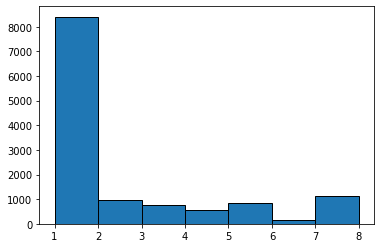

In [ ]:
import matplotlib.pyplot as plt
np.array(dataset,dtype='float64')
n, bins, patches = plt.hist(dataset, equalObs(dataset, 34), edgecolor='black')
plt.show()

In [ ]:
!git clone https://github.com/google-research/bert.git

Cloning into 'bert'...
remote: Enumerating objects: 340, done.
remote: Total 340 (delta 0), reused 0 (delta 0), pack-reused 340
Receiving objects: 100% (340/340), 328.28 KiB | 4.21 MiB/s, done.
Resolving deltas: 100% (182/182), done.




```
# Esto tiene formato de código
import numpy as np
from datetime import datetime
from lxml import etree
times = get_times_XES('PurchasingExample.xes')
def get_times_XES(filename):
    texts = []
    tree = etree.parse('/content/support_modules/tests/fixtures/'+filename)
    root= tree.getroot()
    print(root)
    for element in root.iter():
        tag= element.tag.split('}')[1]
        if(tag== "trace"):
            wordslist = []
            tagslist = []
            for childelement in element.iterchildren():
                ctag= childelement.tag.split('}')[1]
                if(ctag== "string" and childelement.get('key')=='time:timestamp'):
                    doc_name=childelement.get('value')
                elif (ctag=="event"):
                    for grandchildelement in childelement.iterchildren():
                        if(grandchildelement.get('key')=='time:timestamp'):
                            event_name=grandchildelement.get('value')
                        #    print(event_name)
                            wordslist.append(event_name.replace(' ',''))
            texts.append(wordslist)
    return texts

def masterduration():
  duration = generateduration()
  array = equalObs(duration, 34)
  discretedur = discreteduration(array)
  return discretedur

def generateduration():
  dataset = []
  duration = []
  maxval = list()
  i=0
  while i+1 < len(times):
    j = 0
    trace = list()
    duration.append(trace)
    while j+1 < len(times[i]) :
      a = datetime.now().strptime(times[i][j+1], "%Y-%m-%dT%H:%M:%S.%f%z")
      b = datetime.now().strptime(times[i][j], "%Y-%m-%dT%H:%M:%S.%f%z")
      time = a - b
      time_d_float = time.total_seconds()
      j = j + 1
      trace.append(time_d_float)
      dataset.append(time_d_float)
    i = i + 1
  return dataset

def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x)) 
    
def discreteduration(arraydur):
  dataset = []
  duration = []
  maxval = list()
  i=0
  while i+1 < len(times):
    j = 0
    trace = list()
    duration.append(trace)
    while j+1 < len(times[i]) :
      a = datetime.now().strptime(times[i][j+1], "%Y-%m-%dT%H:%M:%S.%f%z")
      b = datetime.now().strptime(times[i][j], "%Y-%m-%dT%H:%M:%S.%f%z")
      time = a - b
      time_d_float = np.digitize(time.total_seconds(),arraydur)
      j = j + 1
      trace.append(time_d_float)
      dataset.append(time_d_float)
    i = i + 1
  return duration

   
   
```



In [ ]:
def learnResources(rol,vectorsize):
    #train model
    model = gensim.models.Word2Vec(rol, size= vectorsize, window=3,  min_count=0)
    nrEpochs= 10
    for epoch in range(nrEpochs):
        if epoch % 2 == 0:
            print ('Now training epoch %s'%epoch)
        model.train(rol,start_alpha=0.025, epochs=nrEpochs,total_examples=model.corpus_count)
        model.alpha -= 0.002  # decrease the learning rate
        model.min_alpha = model.alpha  # fix the learning rate, no decay
    print (model.wv.most_similar('PedroAlvares'))  
    print (model.wv['PedroAlvares']) 
    print (model.wv['KaraldaNimwada']) 
    print (model.wv['KiuKan']) 
    print (model.wv['EsmeraldaClay']) 
    print (model.wv['CarmenFinacse']) 
    print (model.wv['SeanManney']) 
    print (model.wv['KarenClarens']) 
    print (model.wv['ElviraLores']) 
    print (model.wv['KimPassa']) 
    print (model.wv['AnnaKaufmann']) 
    print (model.wv['FjodorKowalski'])
    model.wv.save('/content/drive/MyDrive/MBIT/DeepLearning/'+'A2VVS'+str(vectorsize) +'.model')

In [ ]:
learnResources(roles,4)

Now training epoch 0
Now training epoch 2
Now training epoch 4
Now training epoch 6
Now training epoch 8
[('KaraldaNimwada', 0.9963821172714233), ('KiuKan', 0.842225193977356), ('EsmeraldaClay', 0.7315636277198792), ('CarmenFinacse', 0.7054348587989807), ('SeanManney', 0.6848002076148987), ('KarenClarens', 0.4042677879333496), ('ElviraLores', -0.23479975759983063), ('KimPassa', -0.3406176269054413), ('AnnaKaufmann', -0.3536373972892761), ('FjodorKowalski', -0.3934059143066406)]
[ 1.8200719   2.5716562  -1.2665337  -0.31437567]
[ 1.5227786   2.4476752  -0.95185876 -0.3238936 ]
[ 0.93438435  0.64570993 -0.4177683  -0.78028053]
[ 0.02223864  1.3747575  -0.22916672  0.51249826]
[0.83974326 0.7981098  0.40498185 0.21917158]
[ 1.7325547   0.47948512  0.05499779 -0.75341237]
[-1.1732928   1.6533027  -0.77575433  0.26652518]
[ 0.64904   -0.0882404  1.9579934  1.068015 ]
[-1.0522088  0.5722101  1.6217306  1.6265316]
[ 1.4831849 -1.5417055  1.8929687 -0.515778 ]
[ 0.27647966 -0.2746075   1.82523

In [ ]:
def get_trace_names(filename):
    doc_names=[]
    tree = etree.parse('/content/support_modules/tests/fixtures/'+filename)
    root= tree.getroot()
    for element in root.iter():
        tag= element.tag.split('}')[1]
        if(tag== "trace"):
            for childelement in element.iterchildren():
                ctag= childelement.tag.split('}')[1]
                if(ctag== "string" and childelement.get('key')=='concept:name'):
                        doc_name=childelement.get('value')
                        doc_names.append(doc_name)
                        break
    return doc_names

In [ ]:
traces = get_trace_names('PurchasingExample.xes')

In [ ]:
traces

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '89',
 '91',
 '92',
 '93',
 '94',
 '96',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '106',
 '107',
 '109',
 '110',
 '111',
 '112',
 '115',
 '117',
 '118',
 '119',
 '120',
 '122',
 '123',
 '124',
 '125',
 '127',
 '128',
 '129',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '149',
 '150',
 '151',
 '152',
 '153',

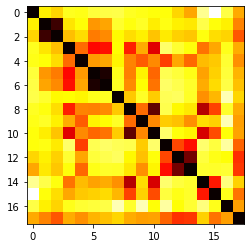

In [ ]:
# import important libraries
import numpy as np
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt
import numpy as np
  
# Create the matrix
x = np.array([[-0.13368179, 0.018120259, 0.0216421, -0.029358733, -0.019365251, 0.010837337, -0.0907669, 0.017176729, -0.082813166, -0.08611039],
              [0.03948159, 0.09309978, 0.085023776, 0.0681968, -0.058186557, 0.07575252, 0.0033439782, -0.07965215, 0.013133565, -0.048327707],
              [0.03284704, 0.07557569, 0.07067298, 0.057814892, -0.049231373, 0.06912217, 0.0008808385, -0.07391249, 0.015820878, -0.0396853],
              [-0.062451426, -0.030721739, -0.019189049, -0.07489768, -0.06866525, 0.09903195, -0.034487087, -0.1063753, 0.0935483, 0.06944592],
              [0.029522808, -0.060492635, -0.10737176, -0.09871192, -0.03139405, 0.08956423, 0.0019585495, -0.09513849, 0.022690121, -0.0651542],
              [0.025084531, 0.03582531, -0.011706207, -0.042861808, -0.11513827, 0.088523515, -0.109257996, -0.09612936, 0.09524621, 0.03704191],
              [0.027137596, 0.03589455, -0.012912647, -0.045047432, -0.12173522, 0.088768646, -0.11461161, -0.09156695, 0.09905226, 0.04132658],
              [-0.007906638, -0.14125994, -0.044519268, 0.092985384, -0.14522009, -0.044321716, 0.00078734057, -0.051378492, 0.0068627214, -0.007099768],
              [-0.02802901, -0.11693919, -0.01229188, -0.007944955, 0.011948715, 0.066721916, -0.08581279, -0.1439941, 0.048577383, 0.048611086],
              [-0.04165481, -0.078643315, -0.10047942, 0.030026928, 0.066471264, 0.12684251, -0.03331492, -0.05276551, 0.084552445, -0.06933922],
              [-0.04897466, -0.09534811, 0.009404668, -0.022701832, -0.0062352116, 0.06743851, -0.06187682, -0.14206678, 0.05377698, 0.06394495],
              [0.059747964, 0.027532522, -0.14062625, -0.047737338, 0.02012678, -0.010687328, 0.0155575825, -0.07556441, -0.034538936, -0.13388763],
              [0.010330622, 0.053178765, -0.13576129, 0.024227023, 0.057376347, 0.041323073, -0.019616604, -0.05992842, -0.101591036, -0.0030773254],
              [-0.011951246, 0.035408445, -0.14257996, 0.0099466825, 0.031448238, 0.04688152, -0.01933137, -0.05865741, -0.08553987, -0.047716733],
              [0.010510791, -0.13451707, -0.021499164, 0.010280189, -0.028638424, -0.005419523, -0.08698605, -0.1789398, 0.046817735, 0.06429974],
              [0.08142598, -0.0941131, -0.02618947, 0.037396256, 0.023905015, -0.009909263, 0.010642295, -0.1226588, 0.094161265, 0.08662793],
              [0.081667244, -0.013874482, 0.08209627, -0.07038408, 0.017771209, 0.07660727, 0.016240215, 0.03177454, -0.08751841, 0.101245746],
              [0.016896285, 0.03617723, -0.04122783, 0.0038834326, 0.03557736, -0.020194603, 0.0045982376, -0.015668608, 0.0139360465, 0.012292147],])
  
# Display the matrix
#print("matrix x:\n", x)
  
# compute the distance matrix
dist_mat = distance_matrix(x, x, p=2)
  
# display distance matrix
#print("Distance Matrix:\n", dist_mat)

plt.imshow(dist_mat, cmap='hot', interpolation='nearest')
plt.show()



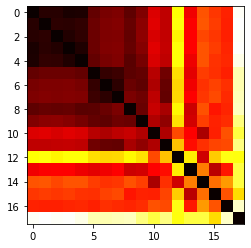

In [ ]:
# import important libraries
import numpy as np
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt
import numpy as np
  
# Create the matrix
x = np.array([[0.46521723, 0.22072423, 0.23861524, 0.16867319, 0.006486727, 0.7510736, 0.3832119, 0.047981437, 0.4701499, 0.026824761],
              [-0.028952226, 0.01183987, 1.7858739, 0.0903705, 0.11977196, 0.45140082, 0.69787776, 0.019770177, 0.21137592, -0.06680041],
              [0.016146548, 0.0013979827, 0.3675826, 0.080030866, 0.0055704312, -0.0077147293, 1.5881524, 0.19915675, 0.31456888, 0.926801],
              [0.024082346, 0.07003829, 0.0046774326, 0.004148089, -0.009140417, 0.064120844, 0.75189257, 0.026838899, 0.9547709, 0.049043797],
              [0.07933739, -0.051943835, 0.020083196, 0.22682263, -0.018160956, 1.1046623, 0.2964817, 0.40792274, 1.3921237, 0.052382562],
              [1.2010208, 1.0655476, 0.07780383, 4.9634056, 0.8520996, 1.6246146, 0.35795864, 1.2517312, 0.024902971, 0.0015222066],
              [0.17342381, -0.113529265, 0.49328586, 6.504383, 0.010722028, 1.9786149, 0.3424135, 0.6776783, 0.10602571, 0.46803004],
              [0.71352106, -0.2759964, -0.024222815, 6.8748274, 0.61150324, 0.7243244, 1.0665159, -0.08601872, -0.15073907, 0.01676534],
              [0.06622688, 0.28227293, -0.0015247854, 2.0926692, 0.088657565, 4.471927, 2.1943672, 1.9900929, 0.74033374, 0.20073555],
              [0.40487283, 0.0052207066, -0.035115946, 5.028734, 0.18980302, 3.8492332, 0.09966843, 0.012818113, 4.4008894, 0.50681365],
              [0.0019943046, 2.280192, 0.865182, 7.152357, 0.2012007, 3.9320474, -0.07650568, -0.025573185, 1.824161, 9.249792],
              [-0.3456091, 2.8009129, 1.2478969, 9.90901, 2.6018512, 2.0230742, 1.2814866, -0.0180772, 0.08263628, 0.6930084],
              [4.570735, 3.3128657, -0.28279844, 13.148347, 3.4709604, 0.94564927, 0.22419666, -0.537545, 0.80404854, 25.618748],
              [7.289951, -0.017043045, 0.29950002, 1.6900637, 4.5818524, 10.977704, -0.08606481, -0.22153507, 2.265714, 2.2326345],
              [-0.14938419, 0.8888028, 1.3443899, 8.329372, 0.9104168, -0.36818585, 0.80519456, 0.26381654, 1.2380136, 17.296965],
              [5.12839, 2.0177634, 0.00018932654, -0.07697272, 10.971627, 9.63205, 3.6144416, 2.878968, 4.419903, 7.0467396],
              [14.041967, 0.39025563, 5.988893, 1.6309642, -0.17706574, 0.75458676, 6.4235415, 0.051367562, 2.5992236, 1.803954],
             [9.099171, 0.26610914, -0.7902201, 17.181261, 18.787457, 10.339707, -0.15462542, 8.055207, 19.70604, 16.194117],])
  
# Display the matrix
#print("matrix x:\n", x)
  
# compute the distance matrix
dist_mat = distance_matrix(x, x, p=2)
  
# display distance matrix
#print("Distance Matrix:\n", dist_mat)

plt.imshow(dist_mat, cmap='hot', interpolation='nearest')
plt.show()



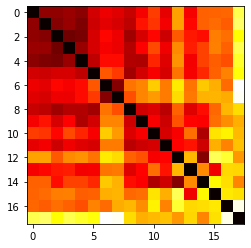

In [ ]:
# import important libraries
import numpy as np
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt
import numpy as np
  
# Create the matrix
x = np.array([[-0.5718511, -1.0124209, 0.04848009, 0.6411495, -0.7778645, -1.079732, -0.71660835, -0.0024354164, 0.24113236, 0.89932287],
              [0.66171294, -0.019512255, -1.5098573, 0.44473532, 0.4402097, -0.86512786, -0.27673656, -0.24797508, 0.11807729, 0.26484302],
              [-0.06098774, 0.086878814, -0.20469275, -0.35694823, -0.0865351, -0.6762001, -1.3656322, -0.4341789, 0.8073896, -0.81149757],
              [-0.07774693, 0.40824822, -0.050643824, -0.41754466, -0.11141104, 0.51797986, -1.5170768, -1.0419734, 0.25174913, 0.53744584],
              [-0.20915432, 0.24056922, -0.68128633, -0.91157037, 0.17580582, -1.1885825, -0.63251454, 0.6428297, 0.9948976, 0.66018903],
              [0.90867764, -1.1566108, 0.56938225, -2.0865119, 0.61799705, -1.2118624, 0.9358897, -0.9922354, -0.2143227, 0.95429707],
              [0.3634783, 0.1056912, -0.49208945, 2.453529, -0.30852488, 2.1651587, 0.6562509, 1.2773402, 0.73508567, 0.2707991],
              [0.81144416, -0.4614742, 0.71706945, 2.7973332, 1.0328443, 1.239806, 0.061819725, 0.5811685, 0.3371331, -0.260032],
              [1.1652734, -0.4054367, 0.029864784, -1.7281064, -0.056105133, -2.1421072, -1.4851067, -1.4663686, -0.15165412, 0.20070273],
              [-0.19750488, -0.2662165, 0.6767638, -3.3901105, -0.75056595, -2.0042791, -0.44065583, 0.78897, 1.7628775, 0.2173719],
              [0.68382114, -2.1908867, 0.4459019, -2.8532436, 0.7380148, -3.0312097, -0.4953278, -0.8078321, 0.26448038, -2.8978236],
              [0.13874799, -1.8131896, -0.9169686, -2.7193952, -1.9152688, -1.2246656, -0.65803874, -0.6411795, -0.12139808, -1.021734],
              [1.4835651, -2.3001854, 0.90219676, -4.0245857, -1.8826768, -0.017722128, -0.6336449, -0.76130563, 0.79951686, -4.845537],
              [2.8085616, -0.006077416, 0.05825877, -1.039119, -2.5332298, -2.474502, -0.1170952, 0.0114754215, 0.6254173, 2.0483105],
              [0.3653086, -1.3553998, 0.9787513, -3.962791, -0.7224653, -0.80536777, -0.7868887, -1.2632889, 1.0472295, -3.583333],
              [2.1174119, 2.1871493, 1.1888174, 0.3143246, -2.3865724, -3.2946773, 2.1230016, -1.4817244, 2.674197, 2.7976792],
              [-3.7296696, 0.33512384, -3.258051, -1.1359395, -0.7155681, 1.44542, 2.6797767, -0.82393146, 1.7369522, 1.0713595],
              [2.1698506, -0.1013674, 1.9814695, -4.803659, -4.7972245, -4.5609527, 0.2889857, -3.0709326, 4.8175364, -3.179394],
              ])
  
# Display the matrix
#print("matrix x:\n", x)
  
# compute the distance matrix
dist_mat = distance_matrix(x, x, p=2)
  
# display distance matrix
#print("Distance Matrix:\n", dist_mat)

plt.imshow(dist_mat, cmap='hot', interpolation='nearest')
plt.show()

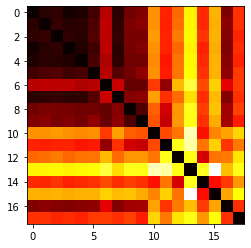

In [ ]:
# import important libraries
import numpy as np
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt
import numpy as np
  
# Create the matrix
x = np.array([[0.15566021, 0.1970432, -0.009822405, 0.11050255, -0.01566067, 0.034165844, 0.44977883, -0.0050604884, -0.0477217, -0.045921728],
              [0.053732846, -0.0999546, -0.7810563, 0.033727504, -0.118999064, 0.18020411, 0.026590219, -0.00021365198, -0.046840217, -0.1259213],
              [0.047123116, -0.15796493, 0.0041457475, 0.09609063, -0.03423147, 0.0032213335, -0.07385661, 0.00031501337, -0.9191742, 0.2840278],
              [-0.005885241, 0.07049766, -0.08771675, -0.017985381, 0.023205709, 0.02627685, 0.5187427, 0.10142401, -0.118110485, -0.220357],
              [-0.0008019223, -0.057791486, -0.013973194, 0.43326157, -0.0085068, 0.056368817, 0.06483053, 0.3174422, -0.19928014, 0.00076506974],
              [0.0015313325, -0.1277295, -0.19796593, 0.3334424, -0.16139144, -1.1171573, 1.543959, -0.018084303, 0.07142505, 0.010225788],
              [0.10549759, -0.026879592, 0.40078568, 5.2475104, -0.0071507106, -0.65201753, 0.1189125, 0.0752954, 0.30608124, -0.27519658],
              [0.50334346, -0.23707509, -0.02180059, -0.37753204, 0.49374235, 0.19288388, 0.054254, 0.022696089, -0.0014224136, 0.035592776],
              [0.019190643, 0.46481228, 0.02230513, 3.0415294, -0.012183098, -0.15973891, 0.7285854, -0.8980546, -0.12309397, 0.118211254],
              [-0.0003384866, -0.1885409, 0.8291734, 3.2397382, 0.10302472, 0.3652576, -0.06568911, -0.0064978707, -1.1942288, -0.41229415],
              [0.0026107868, 3.1090226, 0.16367759, 7.483828, -0.05668469, -1.4926181, -0.2112423, -0.031625774, -0.21373527, -8.379914],
              [0.027511347, -2.6705515, -0.0758432, 7.7138214, -1.4303972, 0.010993984, 0.5143959, 0.011397384, -0.04478317, -1.0935711],
              [0.8389206, 4.8917236, -0.048927415, -3.0566258, 1.0063939, -0.6744661, 0.05779671, 0.03076808, 0.23081961, -8.758897],
              [11.706584, 0.040547274, 0.109506465, -1.8895917, 8.202564, 1.2222846, -0.039708767, 0.0032466832, 0.14147866, -2.5511708],
              [0.26821744, 0.11579223, -0.0075555523, 0.49922535, -0.043632574, 0.036381375, 0.008275067, 0.8751873, -0.0022381386, -8.532383],
              [0.8181575, -0.91356057, -0.06700245, 0.15957505, -5.7265844, -0.192875, 1.1027333, 0.8710467, -4.4879155, -10.272633],
              [2.4044356, 0.13287522, 0.4697956, 0.24542592, 0.04490996, 1.5352379, 2.200105, -0.13742878, -1.4125277, -0.30201617],
              [0.9068216, 0.086477615, -0.13123366, 2.3228247, 2.7310472, 0.38164005, 0.25411475, 7.045095, -3.761715, 0.3068449],
              ])
  
# Display the matrix
#print("matrix x:\n", x)
  
# compute the distance matrix
dist_mat = distance_matrix(x, x, p=2)
  
# display distance matrix
#print("Distance Matrix:\n", dist_mat)

plt.imshow(dist_mat, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
duration

[[1, 1, 1, 1, 1, 2, 2, 6, 3, 1, 1],
 [1, 1, 1, 1, 3, 7, 2, 5, 4, 1, 1],
 [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 1, 3, 3, 7, 1, 1, 1],
 [1, 1, 5, 2, 1, 1, 1, 4, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 2, 5, 6, 1, 1],
 [1, 1, 1, 1, 1, 2, 2, 5, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 2, 5, 3, 1, 1],
 [1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 1],
 [1, 1, 1, 1, 2, 6, 3, 7, 1, 1, 1],
 [1, 1, 1, 1, 4, 7, 5, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 3, 7, 4, 1, 1],
 [1, 1, 1, 1, 1, 6, 2, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 5, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 1, 3, 4, 7, 1, 1, 1],
 [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1, 6, 3],
 [1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 4, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 5, 7, 6, 1, 1],
 [1, 1, 1, 1, 1, 4, 4, 7, 2, 1, 1],
 [1, 1, 1, 1, 1, 3, 2, 7, 6, 1, 1],
 [1, 1, 3,

In [ ]:
import numpy as np
from datetime import datetime
dataset = []
duration = []
maxval = list()
i=0
while i < len(times):
  j = 0
  trace = list()
  duration.append(trace)
  while j+1 < len(times[i]) :
   a = datetime.now().strptime(times[i][j+1], "%Y-%m-%dT%H:%M:%S.%f%z")
   b = datetime.now().strptime(times[i][j], "%Y-%m-%dT%H:%M:%S.%f%z")
   time = a - b
   time_d_float = np.digitize(time.total_seconds(),[0.00000e+00, 6.00000e+01, 4.80000e+02, 1.38000e+03, 3.36000e+03,
       2.67000e+04, 6.39600e+04, 7.65144e+06])
   j = j + 1
   trace.append(time_d_float)
   dataset.append(time_d_float)
  i = i + 1

print(duration)
print(len(times))

[[1, 1, 1, 1, 1, 2, 2, 6, 3, 1, 1], [1, 1, 1, 1, 3, 7, 2, 5, 4, 1, 1], [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 3, 3, 7, 1, 1, 1], [1, 1, 5, 2, 1, 1, 1, 4, 1, 1, 1], [1, 1, 1, 1, 1, 2, 2, 5, 6, 1, 1], [1, 1, 1, 1, 1, 2, 2, 5, 5, 1, 1], [1, 1, 1, 1, 1, 3, 2, 5, 3, 1, 1], [1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 1], [1, 1, 1, 1, 2, 6, 3, 7, 1, 1, 1], [1, 1, 1, 1, 4, 7, 5, 7, 1, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 3, 7, 4, 1, 1], [1, 1, 1, 1, 1, 6, 2, 7, 1, 1, 1], [1, 1, 1, 1, 1, 5, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 3, 4, 7, 1, 1, 1], [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1, 6, 3], [1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1], [1, 1, 1, 1, 1, 2, 4, 7, 1, 1, 1], [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1], [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1], [1, 1, 1, 1, 1, 3, 5, 7, 6, 1, 1], [1, 1, 1, 1, 1, 4, 4, 7, 2, 1, 1], [1, 1, 1, 1, 1, 3, 2, 7, 6, 1, 1], [1, 1, 3, 5, 1, 1, 1, 7, 4, 1, 1], [

In [ ]:
duration

[[1, 1, 1, 1, 1, 2, 2, 6, 3, 1, 1],
 [1, 1, 1, 1, 3, 7, 2, 5, 4, 1, 1],
 [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 1, 3, 3, 7, 1, 1, 1],
 [1, 1, 5, 2, 1, 1, 1, 4, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 2, 5, 6, 1, 1],
 [1, 1, 1, 1, 1, 2, 2, 5, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 2, 5, 3, 1, 1],
 [1, 1, 1, 1, 1, 2, 1, 4, 3, 1, 1],
 [1, 1, 1, 1, 2, 6, 3, 7, 1, 1, 1],
 [1, 1, 1, 1, 4, 7, 5, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 3, 7, 4, 1, 1],
 [1, 1, 1, 1, 1, 6, 2, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 5, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 1, 3, 4, 7, 1, 1, 1],
 [1, 1, 1, 1, 3, 7, 1, 5, 1, 1, 1, 6, 3],
 [1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 4, 7, 1, 1, 1],
 [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 2, 3, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 4, 7, 5, 1, 1],
 [1, 1, 1, 1, 1, 3, 5, 7, 6, 1, 1],
 [1, 1, 1, 1, 1, 4, 4, 7, 2, 1, 1],
 [1, 1, 1, 1, 1, 3, 2, 7, 6, 1, 1],
 [1, 1, 3,

In [ ]:
maxLen = max(map(len, duration))
for row in duration:
    if len(row) < maxLen:
        [row.extend([0]*(maxLen - len(row))) for row in duration]

In [ ]:
duration

[[1,
  1,
  1,
  1,
  1,
  2,
  2,
  6,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  3,
  7,
  2,
  5,
  4,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  3,
  7,
  1,
  5,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  2,
  1,
  3,
  3,
  7,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  5,
  2,
  1,
  1,
  1,
  4,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [ ]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import torch
output_length = 10
output_sequence_length = 18
vocab_size = 10
word_embedding_layer = Embedding(vocab_size, output_length)
durationtens = torch.FloatTensor(duration)
durationtens = tf.convert_to_tensor(value=durationtens, dtype='float32')
embedded_words = word_embedding_layer(durationtens)
print(vocab_size)
print(embedded_words)

10
tf.Tensor(
[[[-0.04234808 -0.00721234  0.02624916 ... -0.0044743  -0.01686738
    0.01404567]
  [-0.04234808 -0.00721234  0.02624916 ... -0.0044743  -0.01686738
    0.01404567]
  [-0.04234808 -0.00721234  0.02624916 ... -0.0044743  -0.01686738
    0.01404567]
  ...
  [-0.02676536 -0.04895878 -0.02547733 ... -0.02450854 -0.02153691
   -0.02509097]
  [-0.02676536 -0.04895878 -0.02547733 ... -0.02450854 -0.02153691
   -0.02509097]
  [-0.02676536 -0.04895878 -0.02547733 ... -0.02450854 -0.02153691
   -0.02509097]]

 [[-0.04234808 -0.00721234  0.02624916 ... -0.0044743  -0.01686738
    0.01404567]
  [-0.04234808 -0.00721234  0.02624916 ... -0.0044743  -0.01686738
    0.01404567]
  [-0.04234808 -0.00721234  0.02624916 ... -0.0044743  -0.01686738
    0.01404567]
  ...
  [-0.02676536 -0.04895878 -0.02547733 ... -0.02450854 -0.02153691
   -0.02509097]
  [-0.02676536 -0.04895878 -0.02547733 ... -0.02450854 -0.02153691
   -0.02509097]
  [-0.02676536 -0.04895878 -0.02547733 ... -0.02450854 -0.0

In [ ]:
print(output_sequence_length)
print(output_length)

18
10


In [ ]:
position_embedding_layer = Embedding(output_sequence_length , output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[ 5.6171641e-03  1.8481165e-04 -4.5108557e-02 -3.4655705e-03
  -8.0471858e-03  2.3441698e-02  4.7857825e-02 -4.5241714e-03
  -3.4627877e-02  2.0868693e-02]
 [-3.7681311e-05  4.1330542e-02  4.7402967e-02 -3.8500652e-03
  -4.2975094e-02  3.1449784e-02 -7.7127218e-03  1.4118526e-02
   5.3923726e-03  1.5381668e-02]
 [ 2.5152612e-02 -3.1021440e-02  6.6428557e-03  4.6602223e-02
  -4.1851163e-02 -3.4412276e-02  1.8365715e-02 -3.0594671e-02
  -4.7777653e-02 -4.9248423e-02]
 [ 2.4242248e-02 -2.2489572e-02  4.8458684e-02  1.5864521e-04
   2.4792124e-02  4.4374112e-02 -1.4513325e-02  4.6191517e-02
   3.8536835e-02 -2.8131319e-02]
 [-4.6179295e-03 -7.8374147e-03 -3.0435657e-02  1.2183726e-02
  -4.5163430e-02 -2.8823614e-03 -2.9978191e-02 -6.4348206e-03
  -3.8762141e-02  6.9470294e-03]
 [ 2.3495380e-02 -3.6436688e-02  4.3319512e-02  2.2012386e-02
   3.0345868e-02  4.6953335e-03  1.2769226e-02  2.8951652e-03
   2.9234402e-03 -4.3226361e-02]
 [-3.7785925e-02 -2.1895779e-02  1.1061907e-02 

matrix x:
 [[-2.41482984e-02  2.94676162e-02 -3.02793030e-02 -3.54802236e-02
   1.70576684e-02  9.24114138e-03 -1.16588473e-02 -8.71824101e-03
   3.52769829e-02  3.43608968e-02]
 [ 2.21973918e-02 -4.68381532e-02  2.58715861e-02  7.61663914e-03
   2.13140287e-02  1.91366412e-02  3.66378576e-04 -3.23842540e-02
  -3.97760868e-02  1.64219253e-02]
 [-3.88846621e-02  3.87280844e-02  4.25136946e-02 -9.86391306e-03
  -1.89065933e-03 -9.65797901e-03  2.50975378e-02  3.48652713e-02
   3.91721837e-02 -5.71684912e-03]
 [-2.60700937e-02  7.88918883e-03  1.48863457e-02  4.13988344e-02
   2.27071531e-02 -1.18752718e-02  2.30732821e-02  4.27219979e-02
  -3.59293073e-03 -3.96916978e-02]
 [ 3.17846052e-02  4.30289656e-03  3.64539288e-02 -3.70165817e-02
   4.90507968e-02 -8.16252083e-03  3.32899019e-03  3.87694687e-03
  -2.00124737e-02 -4.01251093e-02]
 [ 1.23575218e-02 -4.08117548e-02 -3.86900902e-02  1.15030184e-02
  -1.52802952e-02 -4.70404290e-02 -1.74870007e-02  4.33469452e-02
  -1.25208013e-02  4.0

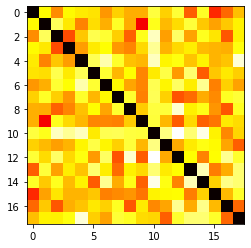

In [ ]:
# import important libraries
import numpy as np
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt
import numpy as np
  
# Create the matrix

x = np.array([[-2.41482984e-02,2.94676162e-02, -3.02793030e-02, -3.54802236e-02, 1.70576684e-02, 9.24114138e-03, -1.16588473e-02, -8.71824101e-03,  3.52769829e-02,  3.43608968e-02],
              [ 2.21973918e-02, -4.68381532e-02,  2.58715861e-02,  7.61663914e-03,2.13140287e-02,  1.91366412e-02,  3.66378576e-04, -3.23842540e-02, -3.97760868e-02,  1.64219253e-02],
              [-3.88846621e-02,  3.87280844e-02,  4.25136946e-02, -9.86391306e-03, -1.89065933e-03, -9.65797901e-03,  2.50975378e-02,  3.48652713e-02,3.91721837e-02, -5.71684912e-03],
              [-2.60700937e-02,  7.88918883e-03,  1.48863457e-02,  4.13988344e-02, 2.27071531e-02, -1.18752718e-02,  2.30732821e-02,  4.27219979e-02,-3.59293073e-03, -3.96916978e-02],
              [ 3.17846052e-02,  4.30289656e-03,  3.64539288e-02, -3.70165817e-02,  4.90507968e-02, -8.16252083e-03,  3.32899019e-03,  3.87694687e-03, -2.00124737e-02, -4.01251093e-02],
              [ 1.23575218e-02, -4.08117548e-02, -3.86900902e-02,  1.15030184e-02, -1.52802952e-02, -4.70404290e-02, -1.74870007e-02,  4.33469452e-02, -1.25208013e-02,  4.08779271e-02],
              [-4.74249832e-02,  1.05516911e-02, -1.59899592e-02,  4.35437448e-02, 2.26328522e-03,  4.73042838e-02, -1.54753104e-02, -3.13816443e-02, -1.82128176e-02,  4.76481058e-02],
              [ 7.43642449e-05, -7.08961487e-03, -2.00027581e-02,  2.24501006e-02, -3.41529474e-02,  2.82780193e-02, -4.16258201e-02,  4.76183183e-02, 2.57819630e-02, -2.85754092e-02],
              [-2.81940103e-02,  2.12190486e-02,  4.71888222e-02 , 4.80406359e-03, 3.33447717e-02,  1.31262429e-02,  1.18926652e-02 , 3.63775752e-02, -2.31378563e-02,  4.76664566e-02],
              [ 3.83906476e-02, -2.30291486e-02,  2.47184187e-03,  2.47028209e-02, -6.42837211e-03,  1.58546232e-02, -2.61685494e-02,-1.95112228e-02, -5.13112545e-03,  1.95526220e-02],
 [-9.51067358e-03, -4.22230251e-02, -4.91817482e-02, -3.95333655e-02,
  -3.13502178e-02,  4.85704429e-02,  4.92344163e-02,  4.45301048e-02,
  -4.93002310e-02,  3.71486656e-02],
 [-3.82474773e-02, -4.03777361e-02,  1.77138709e-02, -2.14669853e-03,
  -2.48455051e-02,  3.88821214e-03,  2.52308510e-02, -3.43443379e-02,
   3.58926542e-02, -3.03669218e-02],
 [ 1.79209001e-02, -4.07348871e-02, -1.87346935e-02,  2.95731537e-02,
  -3.03639174e-02, -3.09415944e-02, -4.97330539e-02, -8.29067081e-03,
   1.39794014e-02, -4.36232202e-02],
 [-2.31588241e-02,  4.25651185e-02, -5.04481792e-03, -4.44338210e-02,
  -1.67611018e-02,  3.73690389e-02, -4.33679335e-02,  1.12458356e-02,
   2.88617611e-03, -2.78023835e-02],
 [ 4.44567315e-02, -4.97344621e-02,  6.44446537e-03,  3.86041440e-02,
   2.13761963e-02, -2.99962163e-02, -1.69537067e-02,  3.82927172e-02,
   4.02613990e-02,  1.33238174e-02],
 [-1.16355047e-02, -4.93905693e-03, -3.45282555e-02, -8.44407082e-03,
   4.99303378e-02,  3.91363166e-02, -2.55688559e-02,  1.78731568e-02,
   4.14470583e-03,  1.29382648e-02],
 [-3.84858847e-02,  1.27883293e-02,  4.42076847e-03, -4.17191871e-02,
  -1.01951845e-02,  1.07045099e-03,  4.75530960e-02,  1.17463246e-02,
  -2.11577900e-02,  2.17377283e-02],
 [-4.83981371e-02, -2.55900975e-02, -2.85715591e-02,  1.23062022e-02,
  -4.63918224e-02, -9.72287729e-03,  4.97729443e-02, -2.66916510e-02,
   8.68256018e-03,  3.65455039e-02]])
  
# Display the matrix
print("matrix x:\n", x)
  
# compute the distance matrix
dist_mat = distance_matrix(x, x, p=2)
  
# display distance matrix
#print("Distance Matrix:\n", dist_mat)

plt.imshow(dist_mat, cmap='hot', interpolation='nearest')
plt.show()